X_train shape: (720, 64, 64, 3)
X_test shape: (180, 64, 64, 3)
y_train shape: (720, 6)
y_test shape: (180, 6)


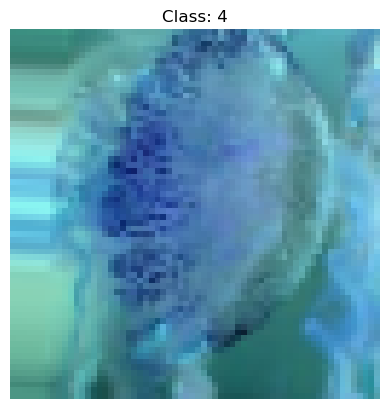

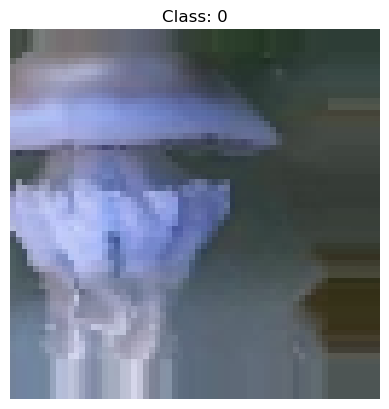

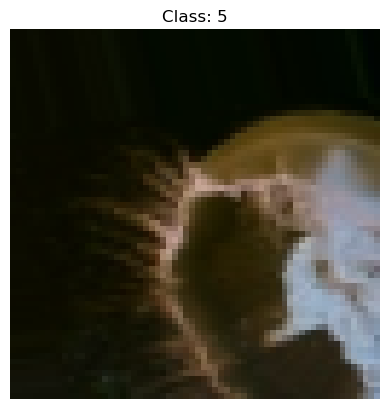

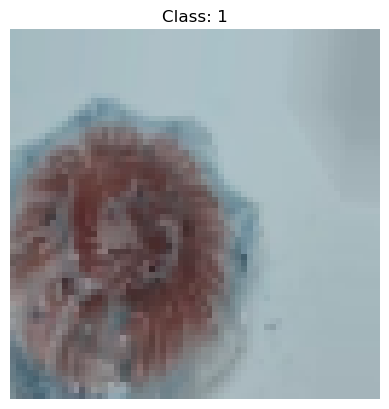

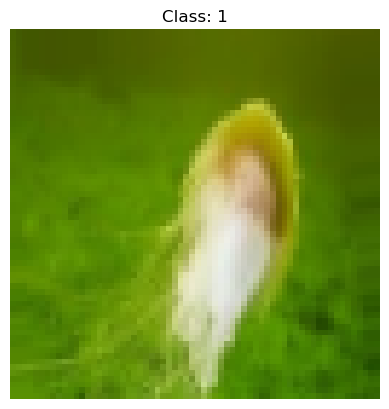

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# DATA PATH
class_paths = [
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\barrel_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\blue_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\compass_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\lions_mane_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\mauve_stinger_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\Moon_jellyfish"
]

# LOAD IMAGE AND LABELS
images = []
labels = []

for i, class_path in enumerate(class_paths):
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        images.append(img)
        labels.append(i)

        
        
# CONVERT LIST TO NUMPY ARRAYS
images = np.array(images)
labels = np.array(labels)


# NORMALIZE PIXEL VALUES
images = images / 255.0

# SPLIT DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# CONVERT LABELS TO ONE -HOT -ENCODING 
y_train = to_categorical(y_train, num_classes=len(class_paths))
y_test = to_categorical(y_test, num_classes=len(class_paths))


# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)



print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



# SHOW FEW AUGMENT IMAGE 
num_images_to_display = 5  
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=num_images_to_display):
    for i in range(num_images_to_display):
        plt.imshow(X_batch[i])
        plt.title(f"Class: {np.argmax(y_batch[i])}")
        plt.axis('off')  
        plt.show()
    break  

Epoch 1/20
23/23 [==============================] - 9s 270ms/step - loss: 2.3763 - accuracy: 0.3125 - val_loss: 1.7476 - val_accuracy: 0.2611
Epoch 2/20
23/23 [==============================] - 5s 232ms/step - loss: 1.8181 - accuracy: 0.3889 - val_loss: 1.6964 - val_accuracy: 0.2500
Epoch 3/20
23/23 [==============================] - 5s 230ms/step - loss: 1.6952 - accuracy: 0.4500 - val_loss: 1.6877 - val_accuracy: 0.3389
Epoch 4/20
23/23 [==============================] - 6s 269ms/step - loss: 1.4725 - accuracy: 0.4875 - val_loss: 1.7146 - val_accuracy: 0.2778
Epoch 5/20
23/23 [==============================] - 6s 255ms/step - loss: 1.4091 - accuracy: 0.5167 - val_loss: 1.8073 - val_accuracy: 0.2667
Epoch 6/20
23/23 [==============================] - 6s 258ms/step - loss: 1.3476 - accuracy: 0.5028 - val_loss: 1.8869 - val_accuracy: 0.2611
Epoch 7/20
23/23 [==============================] - 6s 272ms/step - loss: 1.3649 - accuracy: 0.5125 - val_loss: 1.7270 - val_accuracy: 0.3944
Epoch 

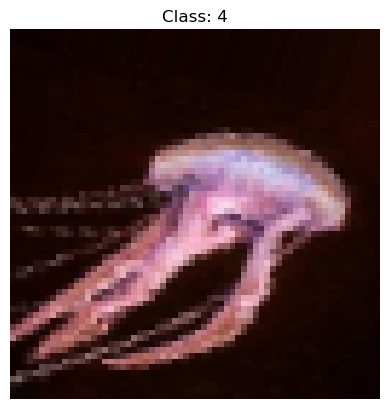

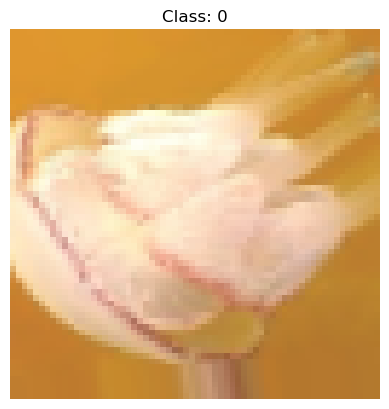

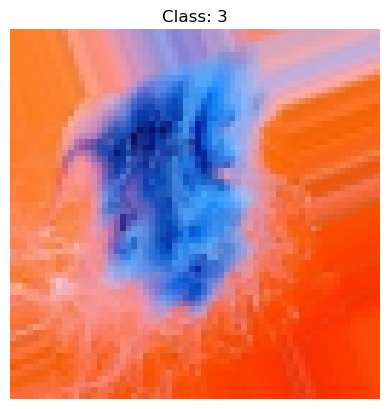

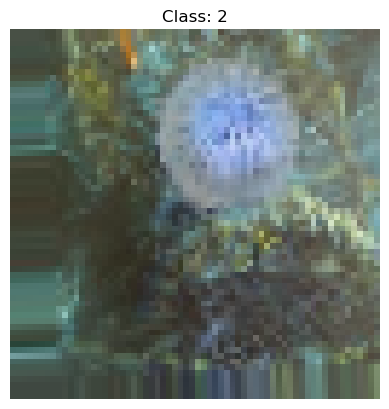

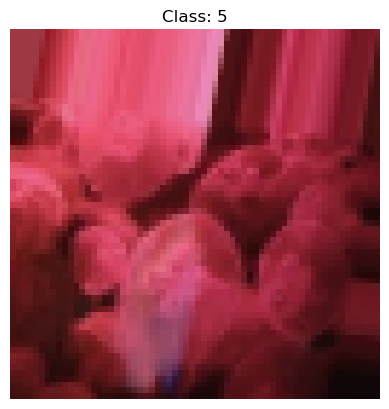

In [3]:
#PERFORM CNN MODEL

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator


# DATA PATH
class_paths = [
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\barrel_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\blue_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\compass_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\lions_mane_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\mauve_stinger_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\Moon_jellyfish"
]

# LOAD IMAGE AND LABELS
images = []
labels = []

for i, class_path in enumerate(class_paths):
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        images.append(img)
        labels.append(i)

        
        
# CONVERT LIST TO NUMPY ARRAYS
images = np.array(images)
labels = np.array(labels)


# NORMALIZE PIXEL VALUES
images = images / 255.0

# SPLIT DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# CONVERT LABELS TO ONE -HOT -ENCODING 
y_train = to_categorical(y_train, num_classes=len(class_paths))
y_test = to_categorical(y_test, num_classes=len(class_paths))


# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)



# BUILD CNN MODEL
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  
model.add(Dense(len(class_paths), activation='softmax'))

# CCOMPILE THE MODEL
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN THE MODEL WITH AUGENT DATA
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test, y_test))

# EVALUATE THE MODEL
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy on test set: {accuracy * 100:.2f}%")




Epoch 1/30
23/23 [==============================] - 8s 288ms/step - loss: 2.3658 - accuracy: 0.3069 - val_loss: 1.7359 - val_accuracy: 0.2167
Epoch 2/30
23/23 [==============================] - 5s 220ms/step - loss: 1.9204 - accuracy: 0.4014 - val_loss: 1.7313 - val_accuracy: 0.2833
Epoch 3/30
23/23 [==============================] - 5s 216ms/step - loss: 1.7203 - accuracy: 0.4333 - val_loss: 1.7208 - val_accuracy: 0.3111
Epoch 4/30
23/23 [==============================] - 5s 235ms/step - loss: 1.5662 - accuracy: 0.4722 - val_loss: 1.7035 - val_accuracy: 0.3167
Epoch 5/30
23/23 [==============================] - 6s 246ms/step - loss: 1.5324 - accuracy: 0.4611 - val_loss: 1.7061 - val_accuracy: 0.3056
Epoch 6/30
23/23 [==============================] - 7s 287ms/step - loss: 1.4191 - accuracy: 0.5153 - val_loss: 1.7101 - val_accuracy: 0.3000
Epoch 7/30
23/23 [==============================] - 6s 263ms/step - loss: 1.3731 - accuracy: 0.5333 - val_loss: 1.7024 - val_accuracy: 0.3056
Epoch 

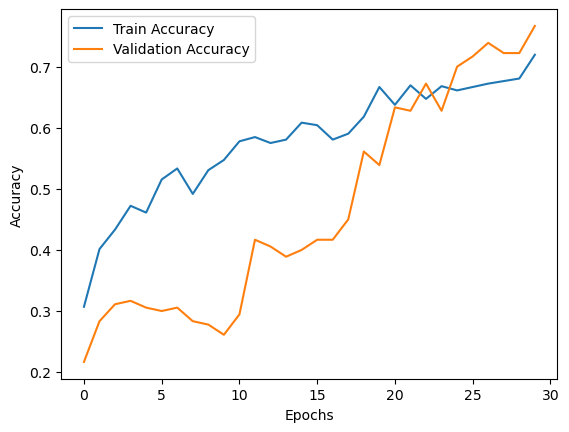

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# DATA PATH
class_paths = [
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\barrel_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\blue_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\compass_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\lions_mane_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\mauve_stinger_jellyfish",
    "C:\\Users\\nh013\\Desktop\\jellifish image dataset\\Moon_jellyfish"
]

# LOAD IMAGE AND LABELS
images = []
labels = []

for i, class_path in enumerate(class_paths):
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))  # RESIZE IMAGE
        images.append(img)
        labels.append(i)

        
        
# CONVERT LIST TO NUMPY ARRAYS
images = np.array(images)
labels = np.array(labels)


# NORMALIZE PIXEL VALUES
images = images / 255.0

# SPLIT DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# CONVERT LABELS TO ONE -HOT -ENCODING 
y_train = to_categorical(y_train, num_classes=len(class_paths))
y_test = to_categorical(y_test, num_classes=len(class_paths))


# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)


# BUILD THE CNN MODEL
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  
model.add(Dense(len(class_paths), activation='softmax'))

#COMPILE THE MODEL WITH A LOWER LEARNING RATE
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# TRAIN THE MODEL WITH AUGMENTED DATA
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=(X_test, y_test))

# EVALUATE THE MODEL
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# PLOT TRAINING HISTORY FOR ANALYSIS
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
